# Beta Deployment

Steps to reproduce:
- pip install requirements.txt into new environment
- activate environment
- download database in the format 

person1

    -img 1
    -img 2
    ...
person2

    -img 1
    

## Import Dependencies

In [1]:
import os 
os.environ["SM_FRAMEWORK"] = "tf.keras"
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
os.environ['NUMBAPRO_NVVM']='/share/pkg.7/cuda/11.2/install/nvvm/lib64/libnvvm.so'
os.environ['NUMBAPRO_LIBDEVICE']='/share/pkg.7/cuda/11.2/install/nvvm/libdevice/'
import segmentation_models as sm
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

Segmentation Models: using `tf.keras` framework.


In [2]:
#reimported tf 2.12.0 as 2.5.0, keras as 2.4.3 

import tensorflow as tf
import keras
import keras_vggface
from keras_vggface.vggface import VGGFace
import mtcnn
import numpy as np
import matplotlib as mpl
from keras.utils.data_utils import get_file
import dlib


import keras_vggface.utils
import PIL
import os
import os.path

In [3]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from deepface import DeepFace
import pandas as pd

In [4]:
def db_find(path, db, model, thresh):
    dfs = DeepFace.find(img_path=path, db_path=db, model_name=models[0], detector_backend="mtcnn", enforce_detection=False)
    df = dfs[0].copy()
    df['id'] = df['identity'].str.strip("atfalmafkoda_unzip/database/person").str.split("/")
    df['id'] = df['id'].apply(lambda x: x[0])
    imgs = df.loc[df["VGG-Face_cosine"] < .25]
    return imgs

## Gradio Demo Depoloyment

In [6]:
import gradio as gr
from PIL import Image

In [7]:
models = [
  "VGG-Face", 
  "Facenet", 
  "Facenet512", 
  "OpenFace", 
  "DeepFace", 
  "DeepID", 
  "ArcFace", 
  "Dlib", 
  "SFace",
]

In [8]:
def db_find(path, db="atfalmafkoda_unzip/database", model=0, thresh=.25):
    m = model
    dfs = DeepFace.find(img_path=path, db_path=db, model_name=models[m], detector_backend="mtcnn", enforce_detection=False)
    df = dfs[0].copy()
    df = df.drop(columns=['source_x', 'source_y', 'source_w', 'source_h'])
    df['id'] = df['identity'].str.strip("atfalmafkoda_unzip/database/person").str.split("/")
    df['id'] = df['id'].apply(lambda x: x[0])
    img_len = df.loc[df["VGG-Face_cosine"] < .3].shape[0]
    imgs = df.head(img_len)['identity'].tolist()
    return df.loc[df["VGG-Face_cosine"] < .3], imgs

In [9]:
demo = gr.Interface(fn=db_find, inputs="image", outputs=["dataframe", "gallery"])
demo.launch(server_name='0.0.0.0', share=True)

IMPORTANT: You are using gradio version 3.9, however version 3.14.0 is available, please upgrade.
--------
Running on local URL:  http://0.0.0.0:7860
Running on public URL: https://9f257a82fe55fc5a.gradio.app

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x2ba1be13de80>,
 'http://localhost:7860/',
 'https://9f257a82fe55fc5a.gradio.app')

# Examples

In [4]:
models = [
  "VGG-Face", 
  "Facenet", 
  "Facenet512", 
  "OpenFace", 
  "DeepFace", 
  "DeepID", 
  "ArcFace", 
  "Dlib", 
  "SFace",
]

In [5]:
path = "atfalmafkoda_unzip/found_children/116883286_2509830975981181_2158562119274127459_n_2509830972647848.jpg"
db = "atfalmafkoda_unzip/database"
dfs = DeepFace.find(img_path=path, db_path=db, model_name=models[0], detector_backend="mtcnn", enforce_detection=False)

There are  364  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 140ms/step
find function lasts  5.398343563079834  seconds


In [3]:
df = dfs[0].copy()
df['id'] = df['identity'].str.strip("atfalmafkoda_unzip/database/person").str.split("/")
df['id'] = df['id'].apply(lambda x: x[0])

NameError: name 'dfs' is not defined

In [8]:
imgs = df.loc[df["VGG-Face_cosine"] < .25]

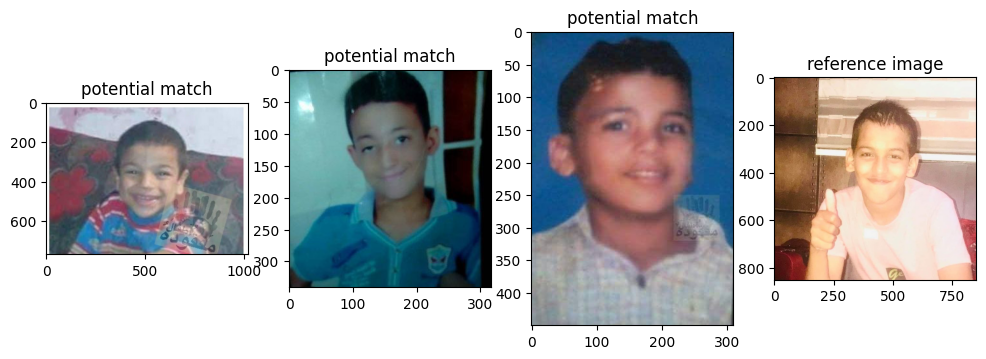

In [ ]:
import matplotlib.pyplot as plt
_, axs = plt.subplots(1, imgs.shape[0]+1, figsize=(12, 12))
axs = axs.flatten()
for (index, row), ax in zip(imgs.iterrows(), axs):
    img = plt.imread(row['identity'])
    ax.imshow(img)
    ax.set_title("potential match")

axs[imgs.shape[0]].imshow(plt.imread(path))
axs[imgs.shape[0]].set_title("reference image")
plt.show()

In [6]:
path = "atfalmafkoda_unzip/found_children/13267856_1582464612051160_6847189532212558662_n_1582464612051160.jpg"
db = "atfalmafkoda_unzip/database"
dfs = DeepFace.find(img_path=path, db_path=db, model_name=models[0], detector_backend="mtcnn", enforce_detection=False)

There are  359  representations found in  representations_vgg_face.pkl


2023-04-14 12:37:34.848767: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14622 MB memory:  -> device: 0, name: Tesla V100-SXM2-16GB, pci bus id: 0000:18:00.0, compute capability: 7.0
2023-04-14 12:37:35.950256: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8201


1/1 [==============================] - 0s 122ms/step
find function lasts  7.594620943069458  seconds


In [7]:
df = dfs[0].copy()
df['id'] = df['identity'].str.strip("atfalmafkoda_unzip/database/person").str.split("/")
df['id'] = df['id'].apply(lambda x: x[0])

In [8]:
df

,identity,source_x,source_y,source_w,source_h,VGG-Face_cosine,id
0,atfalmafkoda_unzip/database/person55/slice_01_...,176,186,152,200,0.219849,55
1,atfalmafkoda_unzip/database/person162/slice_01...,176,186,152,200,0.242744,162
2,atfalmafkoda_unzip/database/person72/slice_01_...,176,186,152,200,0.269482,72
3,atfalmafkoda_unzip/database/person11/slice_01_...,176,186,152,200,0.271394,11
4,atfalmafkoda_unzip/database/person91/slice_02_...,176,186,152,200,0.279447,91
...,...,...,...,...,...,...,...
89,atfalmafkoda_unzip/database/person97/slice_01_...,176,186,152,200,0.396406,97
90,atfalmafkoda_unzip/database/person144/slice_01...,176,186,152,200,0.397772,144
91,atfalmafkoda_unzip/database/person13/slice_01_...,176,186,152,200,0.398403,13
92,atfalmafkoda_unzip/database/person138/slice_01...,176,186,152,200,0.399415,138


In [9]:
imgs = df.loc[df["VGG-Face_cosine"] < .25]

In [10]:
imgs

,identity,source_x,source_y,source_w,source_h,VGG-Face_cosine,id
0,atfalmafkoda_unzip/database/person55/slice_01_...,176,186,152,200,0.219849,55
1,atfalmafkoda_unzip/database/person162/slice_01...,176,186,152,200,0.242744,162


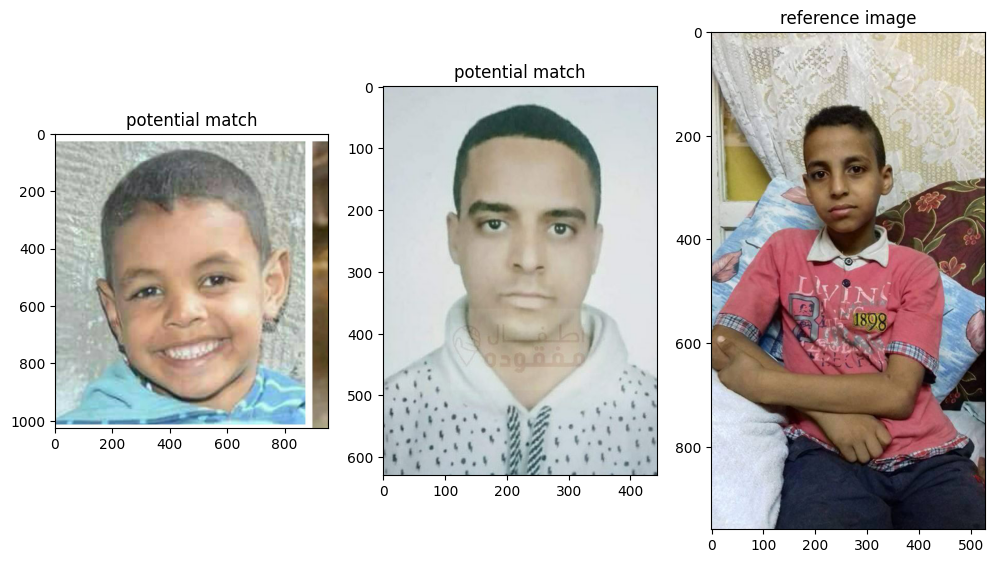

In [12]:
import matplotlib.pyplot as plt
_, axs = plt.subplots(1, imgs.shape[0]+1, figsize=(12, 12))
axs = axs.flatten()
for (index, row), ax in zip(imgs.iterrows(), axs):
    img = plt.imread(row['identity'])
    ax.imshow(img)
    ax.set_title("potential match")

axs[imgs.shape[0]].imshow(plt.imread(path))
axs[imgs.shape[0]].set_title("reference image")
plt.show()

In [18]:
path = "atfalmafkoda_unzip/found_children/15235656_1655095198121434_7634532044858290148_o_1655095198121434.jpg"
db = "atfalmafkoda_unzip/database"
dfs = DeepFace.find(img_path=path, db_path=db, model_name=models[0], detector_backend="mtcnn", enforce_detection=False)

There are  359  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 18ms/step
find function lasts  1.3794565200805664  seconds


In [19]:
df = dfs[0].copy()
df['id'] = df['identity'].str.strip("atfalmafkoda_unzip/database/person").str.split("/")
df['id'] = df['id'].apply(lambda x: x[0])

In [20]:
df

,identity,source_x,source_y,source_w,source_h,VGG-Face_cosine,id
0,atfalmafkoda_unzip/database/person180/slice_01...,235,494,211,281,0.245561,180
1,atfalmafkoda_unzip/database/person197/slice_01...,235,494,211,281,0.264452,197
2,atfalmafkoda_unzip/database/person147/slice_01...,235,494,211,281,0.284389,147
3,atfalmafkoda_unzip/database/person167/slice_01...,235,494,211,281,0.289899,167
4,atfalmafkoda_unzip/database/person58/slice_01_...,235,494,211,281,0.296094,58
...,...,...,...,...,...,...,...
94,atfalmafkoda_unzip/database/person144/slice_01...,235,494,211,281,0.396311,144
95,atfalmafkoda_unzip/database/person164/slice_01...,235,494,211,281,0.397559,164
96,atfalmafkoda_unzip/database/person122/slice_01...,235,494,211,281,0.397900,122
97,atfalmafkoda_unzip/database/person90/slice_01_...,235,494,211,281,0.397906,90


In [21]:
imgs = df.loc[df["VGG-Face_cosine"] < .28]

In [22]:
imgs

,identity,source_x,source_y,source_w,source_h,VGG-Face_cosine,id
0,atfalmafkoda_unzip/database/person180/slice_01...,235,494,211,281,0.245561,180
1,atfalmafkoda_unzip/database/person197/slice_01...,235,494,211,281,0.264452,197


There are  359  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 17ms/step
find function lasts  2.9334614276885986  seconds


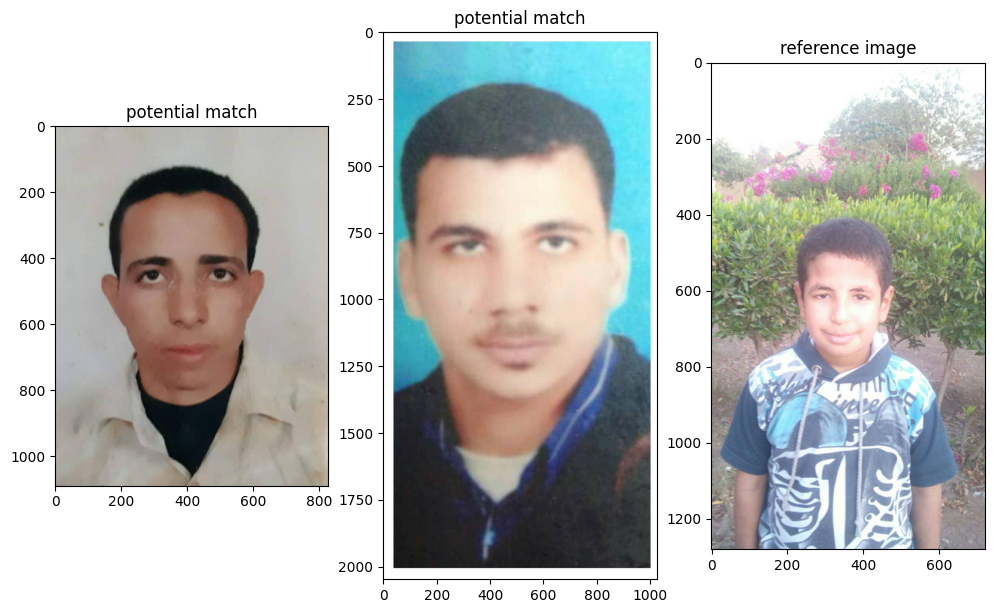

In [12]:
import matplotlib.pyplot as plt
_, axs = plt.subplots(1, imgs.shape[0]+1, figsize=(12, 12))
axs = axs.flatten()
for (index, row), ax in zip(imgs.iterrows(), axs):
    img = plt.imread(row['identity'])
    ax.imshow(img)
    ax.set_title("potential match")

axs[imgs.shape[0]].imshow(plt.imread(path))
axs[imgs.shape[0]].set_title("reference image")
plt.show()

# Test FR (Out of 74)

### VGGFace

In [21]:
def db_find_test(path, db="atfalmafkoda_unzip/database2", model=0):
    m = model
    dfs = DeepFace.find(img_path=path, db_path=db, model_name=models[m], detector_backend="mtcnn", enforce_detection=False)
    df = dfs[0].copy()
    df = df.drop(columns=['source_x', 'source_y', 'source_w', 'source_h'])
    df['id'] = df['identity'].str.strip("atfalmafkoda_unzip/database2/person").str.split("/")
    df['id'] = df['id'].apply(lambda x: x[0])
    #img_len = df.loc[df["VGG-Face_cosine"] < .3].shape[0]
    #imgs = df.head(img_len)['identity'].tolist()
    if df.empty:
        return False
    if df.shape[0] >=5:
        found = df['id'].tolist()[:5]
    else:
        found = df['id'].tolist()[:df.shape[0]]
    actual = (path.lstrip("atfalmafkoda_unzip/validation/person")).split("/")[0]
    if found[0] == actual:
        return True
    return False , {'actual':actual, 'top':found}

In [22]:
valid="atfalmafkoda_unzip/validation/"

vgg_res = []
for d in os.listdir(valid):
    for p in os.listdir(os.path.join(valid, d)): 
        path = os.path.join(valid, d, p)
        if p != ".ipynb_checkpoints":
            vgg_res.append(db_find_test(path))

There are  288  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.1539783477783203  seconds
There are  288  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.3408465385437012  seconds
There are  288  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.256474256515503  seconds
There are  288  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.4384913444519043  seconds
There are  288  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 23ms/step
find function lasts  1.612008810043335  seconds
There are  288  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 26ms/step
find function lasts

1/1 [==============================] - 0s 24ms/step
find function lasts  1.7450683116912842  seconds
There are  288  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.2344212532043457  seconds
There are  288  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 23ms/step
find function lasts  1.6490130424499512  seconds
There are  288  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 20ms/step
find function lasts  1.098703384399414  seconds
There are  288  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.5961511135101318  seconds
There are  288  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 24ms/step
find function lasts  1.3438856601715088  seconds
There are  288  representations found in

1/1 [==============================] - 0s 21ms/step
find function lasts  1.5109500885009766  seconds
There are  288  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.5621259212493896  seconds
There are  288  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 24ms/step
find function lasts  1.5527832508087158  seconds
There are  288  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 20ms/step
find function lasts  1.5494308471679688  seconds
There are  288  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.5004284381866455  seconds
There are  288  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.684762954711914  seconds
There are  288  representations found in

1/1 [==============================] - 0s 21ms/step
find function lasts  1.5918538570404053  seconds
There are  288  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.5614655017852783  seconds
There are  288  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.4286472797393799  seconds
There are  288  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.0530359745025635  seconds
There are  288  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 20ms/step
find function lasts  1.396524429321289  seconds
There are  288  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.278416395187378  seconds
There are  288  representations found in 

1/1 [==============================] - 0s 21ms/step
find function lasts  1.249401569366455  seconds
There are  288  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 19ms/step
find function lasts  1.2504992485046387  seconds
There are  288  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.2564620971679688  seconds
There are  288  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 19ms/step
find function lasts  1.2429261207580566  seconds
There are  288  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.8914320468902588  seconds
There are  288  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.2324485778808594  seconds
There are  288  representations found in

1/1 [==============================] - 0s 22ms/step
find function lasts  1.3268446922302246  seconds
There are  288  representations found in  representations_vgg_face.pkl
2/2 [==============================] - 0s 3ms/step
find function lasts  1.3058502674102783  seconds
There are  288  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.2162086963653564  seconds
There are  288  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 23ms/step
find function lasts  1.0334398746490479  seconds
There are  288  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.2236747741699219  seconds
There are  288  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.1928825378417969  seconds
There are  288  representations found in

1/1 [==============================] - 0s 22ms/step
find function lasts  1.4787161350250244  seconds
There are  288  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 26ms/step
find function lasts  2.013566493988037  seconds
There are  288  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 25ms/step
find function lasts  1.7858197689056396  seconds
There are  288  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 24ms/step
find function lasts  1.5798513889312744  seconds
There are  288  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.527010440826416  seconds
There are  288  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.6030235290527344  seconds
There are  288  representations found in 

1/1 [==============================] - 0s 22ms/step
find function lasts  1.5535368919372559  seconds
There are  288  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.3642752170562744  seconds
There are  288  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.178321361541748  seconds
There are  288  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 23ms/step
find function lasts  1.5182247161865234  seconds
There are  288  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.2124722003936768  seconds
There are  288  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 25ms/step
find function lasts  1.2672457695007324  seconds
There are  288  representations found in

1/1 [==============================] - 0s 23ms/step
find function lasts  1.5786707401275635  seconds
There are  288  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.3971915245056152  seconds
There are  288  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 20ms/step
find function lasts  1.1719963550567627  seconds
There are  288  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 20ms/step
find function lasts  1.4791133403778076  seconds
There are  288  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.552778720855713  seconds
There are  288  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.0858862400054932  seconds
There are  288  representations found in

1/1 [==============================] - 0s 22ms/step
find function lasts  1.6961250305175781  seconds
There are  288  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 24ms/step
find function lasts  1.358790636062622  seconds
There are  288  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 20ms/step
find function lasts  1.392000675201416  seconds
There are  288  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.549152135848999  seconds
There are  288  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 20ms/step
find function lasts  1.1575164794921875  seconds


In [23]:
vgg_res

[(False, {'actual': '78', 'top': ['59', '78', '100', '100', '7']}),
 (False, {'actual': '80', 'top': ['17', '13', '115', '52', '33']}),
 (False, {'actual': '204', 'top': ['108', '04', '163', '165', '140']}),
 (False, {'actual': '51', 'top': ['13', '51', '13', '13', '51']}),
 (False, {'actual': '4', 'top': ['30', '120', '73', '73', '183']}),
 (False, {'actual': '63', 'top': ['8', '182', '32', '187', '92']}),
 (False, {'actual': '203', 'top': ['197', '188', '186', '162', '124']}),
 True,
 (False, {'actual': '75', 'top': ['0', '75', '75', '0', '42']}),
 (False, {'actual': '33', 'top': ['194', '123', '123', '177', '157']}),
 (False, {'actual': '98', 'top': ['3', '36', '100', '114', '7']}),
 True,
 True,
 (False, {'actual': '192', 'top': ['02', '138', '18', '98', '188']}),
 (False, {'actual': '115', 'top': ['129', '75', '112', '180', '171']}),
 (False, {'actual': '69', 'top': ['14', '190', '100', '144', '30']}),
 (False, {'actual': '190', 'top': ['124', '190', '104', '66', '122']}),
 True,


### Facenet

In [7]:
models = [
  "VGG-Face", 
  "Facenet", 
  "Facenet512", 
  "OpenFace", 
  "DeepFace", 
  "DeepID", 
  "ArcFace", 
  "Dlib", 
  "SFace",
]

In [27]:
valid="atfalmafkoda_unzip/validation/"

results = []
for d in os.listdir(valid):
    for p in os.listdir(os.path.join(valid, d)): 
        path = os.path.join(valid, d, p)
        if p != ".ipynb_checkpoints":
            results.append(db_find_test(path, model=1))

There are  288  representations found in  representations_facenet.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  0.8342022895812988  seconds
There are  288  representations found in  representations_facenet.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.0020451545715332  seconds
There are  288  representations found in  representations_facenet.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  0.8819880485534668  seconds
There are  288  representations found in  representations_facenet.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.02278733253479  seconds
There are  288  representations found in  representations_facenet.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.2483296394348145  seconds
There are  288  representations found in  representations_facenet.pkl
1/1 [==============================] - 0s 27ms/step
find function lasts  1.83

1/1 [==============================] - 0s 21ms/step
find function lasts  1.219693660736084  seconds
There are  288  representations found in  representations_facenet.pkl
1/1 [==============================] - 0s 24ms/step
find function lasts  1.328948736190796  seconds
There are  288  representations found in  representations_facenet.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.2098076343536377  seconds
There are  288  representations found in  representations_facenet.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.1746315956115723  seconds
There are  288  representations found in  representations_facenet.pkl
1/1 [==============================] - 0s 28ms/step
find function lasts  1.1981372833251953  seconds
There are  288  representations found in  representations_facenet.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.2195379734039307  seconds
There are  288  representations found in  repr

1/1 [==============================] - 0s 21ms/step
find function lasts  1.2775371074676514  seconds
There are  288  representations found in  representations_facenet.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.2001454830169678  seconds
There are  288  representations found in  representations_facenet.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.0684072971343994  seconds
There are  288  representations found in  representations_facenet.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  0.7111873626708984  seconds
There are  288  representations found in  representations_facenet.pkl
1/1 [==============================] - 0s 23ms/step
find function lasts  1.1436378955841064  seconds
There are  288  representations found in  representations_facenet.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  0.9454240798950195  seconds
There are  288  representations found in  re

1/1 [==============================] - 0s 21ms/step
find function lasts  0.8595201969146729  seconds
There are  288  representations found in  representations_facenet.pkl
1/1 [==============================] - 0s 19ms/step
find function lasts  0.8637313842773438  seconds
There are  288  representations found in  representations_facenet.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  0.9499073028564453  seconds
There are  288  representations found in  representations_facenet.pkl
1/1 [==============================] - 0s 20ms/step
find function lasts  0.8996171951293945  seconds
There are  288  representations found in  representations_facenet.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.1741325855255127  seconds
There are  288  representations found in  representations_facenet.pkl
1/1 [==============================] - 0s 23ms/step
find function lasts  0.8476746082305908  seconds
There are  288  representations found in  re

1/1 [==============================] - 0s 22ms/step
find function lasts  1.1258678436279297  seconds
There are  288  representations found in  representations_facenet.pkl
1/1 [==============================] - 0s 23ms/step
find function lasts  1.234543800354004  seconds
There are  288  representations found in  representations_facenet.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.2941710948944092  seconds
There are  288  representations found in  representations_facenet.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.157109022140503  seconds
There are  288  representations found in  representations_facenet.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.182476282119751  seconds
There are  288  representations found in  representations_facenet.pkl
1/1 [==============================] - 0s 27ms/step
find function lasts  1.7621617317199707  seconds
There are  288  representations found in  repre

1/1 [==============================] - 0s 21ms/step
find function lasts  1.254678726196289  seconds
There are  288  representations found in  representations_facenet.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.0844907760620117  seconds
There are  288  representations found in  representations_facenet.pkl
1/1 [==============================] - 0s 20ms/step
find function lasts  0.8288090229034424  seconds
There are  288  representations found in  representations_facenet.pkl
1/1 [==============================] - 0s 20ms/step
find function lasts  1.153655767440796  seconds
There are  288  representations found in  representations_facenet.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.217175006866455  seconds
There are  288  representations found in  representations_facenet.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  0.78898024559021  seconds
There are  288  representations found in  represe

In [28]:
sum(results)

21

### OpenFace

In [29]:
valid="atfalmafkoda_unzip/validation/"

results = []
for d in os.listdir(valid):
    for p in os.listdir(os.path.join(valid, d)): 
        path = os.path.join(valid, d, p)
        if p != ".ipynb_checkpoints":
            results.append(db_find_test(path, model=3))

Finding representations:   0%|          | 0/282 [00:00<?, ?it/s]

1/1 [==============================] - 0s 20ms/step
openface_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/openface_weights.h5
To: /usr4/ds549/dskahill/.deepface/weights/openface_weights.h5

  0%|          | 0.00/15.3M [00:00<?, ?B/s]
100%|██████████| 15.3M/15.3M [00:00<00:00, 81.8MB/s]
Finding representations:   0%|          | 1/282 [00:03<15:21,  3.28s/it]

1/1 [==============================] - 0s 20ms/step


Finding representations:   1%|          | 2/282 [00:04<08:26,  1.81s/it]

1/1 [==============================] - 0s 22ms/step


Finding representations:   1%|          | 3/282 [00:04<06:05,  1.31s/it]

1/1 [==============================] - 0s 21ms/step


Finding representations:   1%|▏         | 4/282 [00:05<05:24,  1.17s/it]

1/1 [==============================] - 0s 20ms/step


Finding representations:   2%|▏         | 5/282 [00:06<04:40,  1.01s/it]

1/1 [==============================] - 0s 23ms/step


Finding representations:   2%|▏         | 6/282 [00:07<04:16,  1.08it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:   2%|▏         | 7/282 [00:08<04:17,  1.07it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:   3%|▎         | 8/282 [00:09<04:13,  1.08it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:   3%|▎         | 9/282 [00:10<04:34,  1.00s/it]

1/1 [==============================] - 0s 21ms/step


Finding representations:   4%|▎         | 10/282 [00:10<04:02,  1.12it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:   4%|▍         | 11/282 [00:11<03:29,  1.29it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:   4%|▍         | 12/282 [00:12<03:31,  1.28it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:   5%|▍         | 13/282 [00:13<03:34,  1.26it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:   5%|▍         | 14/282 [00:13<03:26,  1.30it/s]

1/1 [==============================] - 0s 25ms/step


Finding representations:   5%|▌         | 15/282 [00:14<03:45,  1.18it/s]

2/2 [==============================] - 0s 4ms/step


Finding representations:   6%|▌         | 16/282 [00:15<03:52,  1.14it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:   6%|▌         | 17/282 [00:16<04:04,  1.08it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:   6%|▋         | 18/282 [00:17<04:04,  1.08it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:   7%|▋         | 19/282 [00:18<03:52,  1.13it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:   7%|▋         | 20/282 [00:19<03:31,  1.24it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:   7%|▋         | 21/282 [00:19<03:22,  1.29it/s]

1/1 [==============================] - 0s 29ms/step


Finding representations:   8%|▊         | 22/282 [00:21<04:10,  1.04it/s]

1/1 [==============================] - 0s 25ms/step


Finding representations:   8%|▊         | 23/282 [00:22<04:39,  1.08s/it]

1/1 [==============================] - 0s 26ms/step


Finding representations:   9%|▊         | 24/282 [00:23<04:49,  1.12s/it]

1/1 [==============================] - 0s 25ms/step


Finding representations:   9%|▉         | 25/282 [00:24<04:27,  1.04s/it]

1/1 [==============================] - 0s 23ms/step


Finding representations:   9%|▉         | 26/282 [00:25<04:22,  1.02s/it]

1/1 [==============================] - 0s 24ms/step


Finding representations:  10%|▉         | 27/282 [00:26<04:13,  1.01it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  10%|▉         | 28/282 [00:27<04:32,  1.07s/it]

1/1 [==============================] - 0s 21ms/step


Finding representations:  10%|█         | 29/282 [00:28<04:33,  1.08s/it]

1/1 [==============================] - 0s 21ms/step


Finding representations:  11%|█         | 30/282 [00:30<04:35,  1.09s/it]

1/1 [==============================] - 0s 21ms/step


Finding representations:  11%|█         | 31/282 [00:30<04:13,  1.01s/it]

1/1 [==============================] - 0s 22ms/step


Finding representations:  11%|█▏        | 32/282 [00:31<03:55,  1.06it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  12%|█▏        | 33/282 [00:32<03:40,  1.13it/s]

3/3 [==============================] - 0s 3ms/step


Finding representations:  12%|█▏        | 34/282 [00:33<03:25,  1.20it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:  12%|█▏        | 35/282 [00:33<03:05,  1.33it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  13%|█▎        | 36/282 [00:34<03:10,  1.29it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  13%|█▎        | 37/282 [00:35<03:05,  1.32it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  13%|█▎        | 38/282 [00:35<02:53,  1.40it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  14%|█▍        | 39/282 [00:36<03:15,  1.25it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  14%|█▍        | 40/282 [00:37<03:27,  1.17it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  15%|█▍        | 41/282 [00:38<03:31,  1.14it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  15%|█▍        | 42/282 [00:39<03:17,  1.21it/s]

1/1 [==============================] - 0s 25ms/step


Finding representations:  15%|█▌        | 43/282 [00:40<03:09,  1.26it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  16%|█▌        | 44/282 [00:40<03:00,  1.32it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  16%|█▌        | 45/282 [00:41<02:54,  1.35it/s]

3/3 [==============================] - 0s 3ms/step


Finding representations:  16%|█▋        | 46/282 [00:42<02:46,  1.42it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  17%|█▋        | 47/282 [00:42<02:45,  1.42it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  17%|█▋        | 48/282 [00:43<02:47,  1.40it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  17%|█▋        | 49/282 [00:44<02:59,  1.30it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  18%|█▊        | 50/282 [00:45<03:29,  1.10it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  18%|█▊        | 51/282 [00:46<03:30,  1.10it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  18%|█▊        | 52/282 [00:47<03:09,  1.22it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  19%|█▉        | 53/282 [00:48<03:21,  1.13it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  19%|█▉        | 54/282 [00:49<03:33,  1.07it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  20%|█▉        | 55/282 [00:49<03:15,  1.16it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  20%|█▉        | 56/282 [00:51<03:43,  1.01it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  20%|██        | 57/282 [00:52<03:52,  1.03s/it]

1/1 [==============================] - 0s 26ms/step


Finding representations:  21%|██        | 58/282 [00:53<04:01,  1.08s/it]

1/1 [==============================] - 0s 23ms/step


Finding representations:  21%|██        | 59/282 [00:54<04:07,  1.11s/it]

1/1 [==============================] - 0s 22ms/step


Finding representations:  21%|██▏       | 60/282 [00:55<04:05,  1.11s/it]

1/1 [==============================] - 0s 20ms/step


Finding representations:  22%|██▏       | 61/282 [00:56<03:42,  1.01s/it]

1/1 [==============================] - 0s 23ms/step


Finding representations:  22%|██▏       | 62/282 [00:57<03:21,  1.09it/s]

1/1 [==============================] - 0s 26ms/step


Finding representations:  22%|██▏       | 63/282 [00:58<04:04,  1.12s/it]

1/1 [==============================] - 0s 22ms/step


Finding representations:  23%|██▎       | 64/282 [00:59<03:43,  1.02s/it]

1/1 [==============================] - 0s 23ms/step


Finding representations:  23%|██▎       | 65/282 [01:00<03:26,  1.05it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  23%|██▎       | 66/282 [01:01<03:21,  1.07it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  24%|██▍       | 67/282 [01:02<03:07,  1.15it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  24%|██▍       | 68/282 [01:03<03:27,  1.03it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  24%|██▍       | 69/282 [01:04<03:21,  1.06it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  25%|██▍       | 70/282 [01:05<03:12,  1.10it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  25%|██▌       | 71/282 [01:05<03:10,  1.11it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  26%|██▌       | 72/282 [01:06<03:05,  1.13it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  26%|██▌       | 73/282 [01:07<03:04,  1.13it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  26%|██▌       | 74/282 [01:08<03:06,  1.11it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  27%|██▋       | 75/282 [01:09<02:43,  1.26it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:  27%|██▋       | 76/282 [01:09<02:37,  1.31it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  27%|██▋       | 77/282 [01:11<03:06,  1.10it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  28%|██▊       | 78/282 [01:11<02:49,  1.20it/s]

1/1 [==============================] - 0s 26ms/step


Finding representations:  28%|██▊       | 79/282 [01:12<02:52,  1.18it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  28%|██▊       | 80/282 [01:13<03:10,  1.06it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  29%|██▊       | 81/282 [01:14<03:02,  1.10it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  29%|██▉       | 82/282 [01:15<02:49,  1.18it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  29%|██▉       | 83/282 [01:16<02:57,  1.12it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  30%|██▉       | 84/282 [01:16<02:40,  1.23it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  30%|███       | 85/282 [01:18<02:56,  1.12it/s]

1/1 [==============================] - 0s 52ms/step


Finding representations:  30%|███       | 86/282 [01:19<03:54,  1.20s/it]

1/1 [==============================] - 0s 27ms/step


Finding representations:  31%|███       | 87/282 [01:20<03:30,  1.08s/it]

1/1 [==============================] - 0s 24ms/step


Finding representations:  31%|███       | 88/282 [01:21<03:22,  1.05s/it]

1/1 [==============================] - 0s 22ms/step


Finding representations:  32%|███▏      | 89/282 [01:22<03:06,  1.04it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  32%|███▏      | 90/282 [01:23<03:08,  1.02it/s]

3/3 [==============================] - 0s 3ms/step


Finding representations:  32%|███▏      | 91/282 [01:24<03:03,  1.04it/s]

1/1 [==============================] - 0s 25ms/step


Finding representations:  33%|███▎      | 92/282 [01:25<03:07,  1.01it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  33%|███▎      | 93/282 [01:26<02:45,  1.14it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  33%|███▎      | 94/282 [01:26<02:46,  1.13it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  34%|███▎      | 95/282 [01:27<02:38,  1.18it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  34%|███▍      | 96/282 [01:28<02:21,  1.31it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  34%|███▍      | 97/282 [01:28<02:12,  1.40it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  35%|███▍      | 98/282 [01:29<02:06,  1.46it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  35%|███▌      | 99/282 [01:30<02:01,  1.50it/s]

1/1 [==============================] - 0s 27ms/step


Finding representations:  35%|███▌      | 100/282 [01:30<01:59,  1.52it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  36%|███▌      | 101/282 [01:31<01:52,  1.61it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  36%|███▌      | 102/282 [01:31<01:51,  1.61it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  37%|███▋      | 103/282 [01:32<01:51,  1.60it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  37%|███▋      | 104/282 [01:33<02:15,  1.32it/s]

5/5 [==============================] - 0s 3ms/step


Finding representations:  37%|███▋      | 105/282 [01:34<02:24,  1.23it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  38%|███▊      | 106/282 [01:35<02:37,  1.12it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  38%|███▊      | 107/282 [01:36<02:34,  1.14it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  38%|███▊      | 108/282 [01:37<02:32,  1.14it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  39%|███▊      | 109/282 [01:38<02:26,  1.18it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  39%|███▉      | 110/282 [01:38<02:22,  1.21it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  39%|███▉      | 111/282 [01:39<02:17,  1.25it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  40%|███▉      | 112/282 [01:40<02:13,  1.28it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  40%|████      | 113/282 [01:41<02:10,  1.30it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  40%|████      | 114/282 [01:42<02:31,  1.11it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  41%|████      | 115/282 [01:43<02:26,  1.14it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  41%|████      | 116/282 [01:44<02:21,  1.17it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  41%|████▏     | 117/282 [01:44<02:21,  1.16it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  42%|████▏     | 118/282 [01:45<02:29,  1.10it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  42%|████▏     | 119/282 [01:46<02:23,  1.13it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  43%|████▎     | 120/282 [01:47<02:21,  1.15it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  43%|████▎     | 121/282 [01:48<02:19,  1.15it/s]

4/4 [==============================] - 0s 4ms/step


Finding representations:  43%|████▎     | 122/282 [01:49<02:14,  1.19it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  44%|████▎     | 123/282 [01:50<02:11,  1.21it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  44%|████▍     | 124/282 [01:50<02:09,  1.22it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  44%|████▍     | 125/282 [01:51<02:10,  1.21it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  45%|████▍     | 126/282 [01:52<02:10,  1.19it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  45%|████▌     | 127/282 [01:53<02:11,  1.18it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  45%|████▌     | 128/282 [01:54<02:08,  1.20it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  46%|████▌     | 129/282 [01:54<02:03,  1.24it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  46%|████▌     | 130/282 [01:55<01:58,  1.28it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  46%|████▋     | 131/282 [01:56<02:08,  1.18it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  47%|████▋     | 132/282 [01:57<02:09,  1.16it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  47%|████▋     | 133/282 [01:58<02:14,  1.10it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  48%|████▊     | 134/282 [01:59<02:10,  1.14it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  48%|████▊     | 135/282 [02:00<02:03,  1.19it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  48%|████▊     | 136/282 [02:00<01:56,  1.25it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  49%|████▊     | 137/282 [02:01<01:53,  1.28it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  49%|████▉     | 138/282 [02:02<01:46,  1.36it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  49%|████▉     | 139/282 [02:02<01:43,  1.38it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  50%|████▉     | 140/282 [02:03<01:45,  1.34it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  50%|█████     | 141/282 [02:04<01:43,  1.36it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  50%|█████     | 142/282 [02:05<01:38,  1.42it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  51%|█████     | 143/282 [02:05<01:37,  1.43it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  51%|█████     | 144/282 [02:06<01:50,  1.25it/s]

3/3 [==============================] - 0s 3ms/step


Finding representations:  51%|█████▏    | 145/282 [02:07<01:52,  1.22it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:  52%|█████▏    | 146/282 [02:08<01:58,  1.15it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:  52%|█████▏    | 147/282 [02:09<02:07,  1.06it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  52%|█████▏    | 148/282 [02:10<02:08,  1.04it/s]

1/1 [==============================] - 0s 43ms/step


Finding representations:  53%|█████▎    | 149/282 [02:12<02:39,  1.20s/it]

1/1 [==============================] - 0s 26ms/step


Finding representations:  53%|█████▎    | 150/282 [02:13<02:28,  1.13s/it]

1/1 [==============================] - 0s 28ms/step


Finding representations:  54%|█████▎    | 151/282 [02:14<02:30,  1.15s/it]

1/1 [==============================] - 0s 22ms/step


Finding representations:  54%|█████▍    | 152/282 [02:15<02:14,  1.03s/it]

1/1 [==============================] - 0s 24ms/step


Finding representations:  54%|█████▍    | 153/282 [02:16<02:01,  1.06it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  55%|█████▍    | 154/282 [02:16<01:54,  1.11it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  55%|█████▍    | 155/282 [02:17<01:42,  1.24it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  55%|█████▌    | 156/282 [02:18<01:42,  1.23it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  56%|█████▌    | 157/282 [02:19<01:37,  1.29it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  56%|█████▌    | 158/282 [02:19<01:27,  1.42it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  56%|█████▋    | 159/282 [02:20<01:29,  1.38it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  57%|█████▋    | 160/282 [02:21<01:30,  1.36it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  57%|█████▋    | 161/282 [02:21<01:30,  1.34it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  57%|█████▋    | 162/282 [02:22<01:39,  1.20it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  58%|█████▊    | 163/282 [02:23<01:44,  1.14it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  58%|█████▊    | 164/282 [02:24<01:48,  1.09it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  59%|█████▊    | 165/282 [02:25<01:50,  1.06it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  59%|█████▉    | 166/282 [02:26<01:47,  1.08it/s]

1/1 [==============================] - 0s 25ms/step


Finding representations:  59%|█████▉    | 167/282 [02:27<01:48,  1.06it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  60%|█████▉    | 168/282 [02:28<01:52,  1.01it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:  60%|█████▉    | 169/282 [02:30<02:11,  1.17s/it]

1/1 [==============================] - 0s 22ms/step


Finding representations:  60%|██████    | 170/282 [02:31<02:10,  1.17s/it]

1/1 [==============================] - 0s 23ms/step


Finding representations:  61%|██████    | 171/282 [02:32<02:04,  1.12s/it]

1/1 [==============================] - 0s 21ms/step


Finding representations:  61%|██████    | 172/282 [02:33<01:44,  1.05it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  61%|██████▏   | 173/282 [02:34<01:39,  1.09it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  62%|██████▏   | 174/282 [02:35<01:48,  1.01s/it]

1/1 [==============================] - 0s 22ms/step


Finding representations:  62%|██████▏   | 175/282 [02:36<01:40,  1.06it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  62%|██████▏   | 176/282 [02:36<01:33,  1.13it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  63%|██████▎   | 177/282 [02:37<01:42,  1.03it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  63%|██████▎   | 178/282 [02:38<01:33,  1.12it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  63%|██████▎   | 179/282 [02:39<01:29,  1.15it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  64%|██████▍   | 180/282 [02:40<01:21,  1.25it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  64%|██████▍   | 181/282 [02:40<01:19,  1.26it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  65%|██████▍   | 182/282 [02:41<01:26,  1.15it/s]

3/3 [==============================] - 0s 3ms/step


Finding representations:  65%|██████▍   | 183/282 [02:42<01:28,  1.12it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  65%|██████▌   | 184/282 [02:44<01:33,  1.04it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  66%|██████▌   | 185/282 [02:44<01:29,  1.09it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  66%|██████▌   | 186/282 [02:45<01:20,  1.20it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:  66%|██████▋   | 187/282 [02:46<01:28,  1.07it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  67%|██████▋   | 188/282 [02:47<01:21,  1.15it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  67%|██████▋   | 189/282 [02:48<01:15,  1.24it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  67%|██████▋   | 190/282 [02:48<01:11,  1.30it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  68%|██████▊   | 191/282 [02:49<01:06,  1.37it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  68%|██████▊   | 192/282 [02:50<01:05,  1.38it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:  68%|██████▊   | 193/282 [02:51<01:22,  1.07it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  69%|██████▉   | 194/282 [02:52<01:28,  1.00s/it]

1/1 [==============================] - 0s 23ms/step


Finding representations:  69%|██████▉   | 195/282 [02:53<01:30,  1.04s/it]

1/1 [==============================] - 0s 21ms/step


Finding representations:  70%|██████▉   | 196/282 [02:54<01:20,  1.07it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  70%|██████▉   | 197/282 [02:55<01:15,  1.12it/s]

1/1 [==============================] - 0s 25ms/step


Finding representations:  70%|███████   | 198/282 [02:57<01:43,  1.23s/it]

1/1 [==============================] - 0s 25ms/step


Finding representations:  71%|███████   | 199/282 [02:58<01:31,  1.10s/it]

1/1 [==============================] - 0s 22ms/step


Finding representations:  71%|███████   | 200/282 [02:59<01:26,  1.06s/it]

1/1 [==============================] - 0s 21ms/step


Finding representations:  71%|███████▏  | 201/282 [02:59<01:19,  1.02it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  72%|███████▏  | 202/282 [03:00<01:13,  1.09it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  72%|███████▏  | 203/282 [03:01<01:09,  1.13it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  72%|███████▏  | 204/282 [03:02<01:06,  1.16it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  73%|███████▎  | 205/282 [03:02<00:59,  1.30it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  73%|███████▎  | 206/282 [03:03<01:07,  1.13it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  73%|███████▎  | 207/282 [03:04<01:00,  1.23it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  74%|███████▍  | 208/282 [03:05<01:06,  1.12it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  74%|███████▍  | 209/282 [03:06<01:05,  1.11it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  74%|███████▍  | 210/282 [03:07<01:02,  1.15it/s]

1/1 [==============================] - 0s 26ms/step


Finding representations:  75%|███████▍  | 211/282 [03:08<01:00,  1.18it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  75%|███████▌  | 212/282 [03:08<00:55,  1.27it/s]

1/1 [==============================] - 0s 30ms/step


Finding representations:  76%|███████▌  | 213/282 [03:10<01:13,  1.07s/it]

1/1 [==============================] - 0s 24ms/step


Finding representations:  76%|███████▌  | 214/282 [03:11<01:08,  1.01s/it]

1/1 [==============================] - 0s 21ms/step


Finding representations:  76%|███████▌  | 215/282 [03:12<01:03,  1.05it/s]

1/1 [==============================] - 0s 29ms/step


Finding representations:  77%|███████▋  | 216/282 [03:13<01:02,  1.05it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:  77%|███████▋  | 217/282 [03:13<00:58,  1.11it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  77%|███████▋  | 218/282 [03:14<00:58,  1.10it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  78%|███████▊  | 219/282 [03:15<00:51,  1.22it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  78%|███████▊  | 220/282 [03:16<00:50,  1.22it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  78%|███████▊  | 221/282 [03:17<00:51,  1.18it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:  79%|███████▊  | 222/282 [03:18<00:53,  1.11it/s]

2/2 [==============================] - 0s 4ms/step


Finding representations:  79%|███████▉  | 223/282 [03:19<00:52,  1.13it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  79%|███████▉  | 224/282 [03:20<00:51,  1.12it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  80%|███████▉  | 225/282 [03:21<00:55,  1.03it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  80%|████████  | 226/282 [03:22<00:53,  1.04it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  80%|████████  | 227/282 [03:23<00:55,  1.01s/it]

1/1 [==============================] - 0s 22ms/step


Finding representations:  81%|████████  | 228/282 [03:24<00:57,  1.06s/it]

1/1 [==============================] - 0s 24ms/step


Finding representations:  81%|████████  | 229/282 [03:25<00:51,  1.03it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  82%|████████▏ | 230/282 [03:26<00:52,  1.00s/it]

1/1 [==============================] - 0s 22ms/step


Finding representations:  82%|████████▏ | 231/282 [03:27<00:51,  1.02s/it]

1/1 [==============================] - 0s 26ms/step


Finding representations:  82%|████████▏ | 232/282 [03:28<00:52,  1.06s/it]

1/1 [==============================] - 0s 22ms/step


Finding representations:  83%|████████▎ | 233/282 [03:29<00:49,  1.00s/it]

1/1 [==============================] - 0s 21ms/step


Finding representations:  83%|████████▎ | 234/282 [03:30<00:44,  1.07it/s]

1/1 [==============================] - 0s 26ms/step


Finding representations:  83%|████████▎ | 235/282 [03:31<00:46,  1.00it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  84%|████████▎ | 236/282 [03:32<00:49,  1.08s/it]

1/1 [==============================] - 0s 22ms/step


Finding representations:  84%|████████▍ | 237/282 [03:33<00:49,  1.10s/it]

1/1 [==============================] - 0s 21ms/step


Finding representations:  84%|████████▍ | 238/282 [03:34<00:42,  1.05it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  85%|████████▍ | 239/282 [03:35<00:38,  1.12it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  85%|████████▌ | 240/282 [03:35<00:36,  1.16it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  85%|████████▌ | 241/282 [03:36<00:32,  1.27it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  86%|████████▌ | 242/282 [03:37<00:31,  1.28it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  86%|████████▌ | 243/282 [03:37<00:29,  1.32it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  87%|████████▋ | 244/282 [03:38<00:27,  1.37it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  87%|████████▋ | 245/282 [03:39<00:26,  1.40it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  87%|████████▋ | 246/282 [03:39<00:24,  1.46it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  88%|████████▊ | 247/282 [03:40<00:23,  1.46it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  88%|████████▊ | 248/282 [03:41<00:23,  1.45it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  88%|████████▊ | 249/282 [03:42<00:23,  1.40it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  89%|████████▊ | 250/282 [03:42<00:21,  1.47it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  89%|████████▉ | 251/282 [03:43<00:22,  1.38it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  89%|████████▉ | 252/282 [03:44<00:21,  1.39it/s]

1/1 [==============================] - 0s 25ms/step


Finding representations:  90%|████████▉ | 253/282 [03:44<00:21,  1.38it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  90%|█████████ | 254/282 [03:45<00:20,  1.36it/s]

3/3 [==============================] - 0s 3ms/step


Finding representations:  90%|█████████ | 255/282 [03:46<00:19,  1.39it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  91%|█████████ | 256/282 [03:47<00:19,  1.36it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  91%|█████████ | 257/282 [03:47<00:19,  1.31it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  91%|█████████▏| 258/282 [03:48<00:17,  1.38it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  92%|█████████▏| 259/282 [03:49<00:17,  1.34it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  92%|█████████▏| 260/282 [03:50<00:16,  1.31it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  93%|█████████▎| 261/282 [03:50<00:14,  1.43it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  93%|█████████▎| 262/282 [03:51<00:14,  1.41it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  93%|█████████▎| 263/282 [03:52<00:16,  1.16it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  94%|█████████▎| 264/282 [03:53<00:15,  1.17it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  94%|█████████▍| 265/282 [03:54<00:15,  1.10it/s]

2/2 [==============================] - 0s 3ms/step


Finding representations:  94%|█████████▍| 266/282 [03:55<00:14,  1.11it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:  95%|█████████▍| 267/282 [03:56<00:14,  1.07it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:  95%|█████████▌| 268/282 [03:57<00:13,  1.06it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  95%|█████████▌| 269/282 [03:58<00:12,  1.03it/s]

1/1 [==============================] - 0s 27ms/step


Finding representations:  96%|█████████▌| 270/282 [03:59<00:12,  1.00s/it]

2/2 [==============================] - 0s 3ms/step


Finding representations:  96%|█████████▌| 271/282 [04:00<00:10,  1.04it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  96%|█████████▋| 272/282 [04:01<00:09,  1.00it/s]

2/2 [==============================] - 0s 3ms/step


Finding representations:  97%|█████████▋| 273/282 [04:02<00:08,  1.03it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  97%|█████████▋| 274/282 [04:03<00:07,  1.01it/s]

1/1 [==============================] - 0s 27ms/step


Finding representations:  98%|█████████▊| 275/282 [04:05<00:08,  1.23s/it]

1/1 [==============================] - 0s 25ms/step


Finding representations:  98%|█████████▊| 276/282 [04:05<00:06,  1.08s/it]

1/1 [==============================] - 0s 26ms/step


Finding representations:  98%|█████████▊| 277/282 [04:06<00:05,  1.01s/it]

3/3 [==============================] - 0s 4ms/step


Finding representations:  99%|█████████▊| 278/282 [04:07<00:03,  1.04it/s]

4/4 [==============================] - 0s 5ms/step


Finding representations:  99%|█████████▉| 279/282 [04:08<00:02,  1.11it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  99%|█████████▉| 280/282 [04:09<00:02,  1.05s/it]

1/1 [==============================] - 0s 21ms/step


Finding representations: 100%|█████████▉| 281/282 [04:10<00:00,  1.05it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations: 100%|██████████| 282/282 [04:11<00:00,  1.12it/s]

Representations stored in atfalmafkoda_unzip/database2/representations_openface.pkl file.Please delete this file when you add new identities in your database.
1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step
find function lasts  252.2654447555542  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  0.9575667381286621  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  0.8691139221191406  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.0371885299682617  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.3080217838287354  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.2589235305786133  seconds
There are  288  representations found in

1/1 [==============================] - 0s 25ms/step
find function lasts  0.8790366649627686  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.0856921672821045  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  0.7511196136474609  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.1926703453063965  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 20ms/step
find function lasts  0.6623196601867676  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.094486951828003  seconds
There are  288  representations found in

1/1 [==============================] - 0s 23ms/step
find function lasts  1.1929311752319336  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 24ms/step
find function lasts  1.1511869430541992  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.1644420623779297  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.1785955429077148  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.2083966732025146  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 23ms/step
find function lasts  1.0585737228393555  seconds
There are  288  representations found i

1/1 [==============================] - 0s 21ms/step
find function lasts  0.8311381340026855  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  0.8570647239685059  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 24ms/step
find function lasts  0.8781123161315918  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 20ms/step
find function lasts  0.9056742191314697  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.221940517425537  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  0.8295481204986572  seconds
There are  288  representations found in

1/1 [==============================] - 0s 22ms/step
find function lasts  1.0049750804901123  seconds
There are  288  representations found in  representations_openface.pkl
2/2 [==============================] - 0s 3ms/step
find function lasts  0.9881210327148438  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 23ms/step
find function lasts  0.8460907936096191  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  0.6704940795898438  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  0.8469624519348145  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 28ms/step
find function lasts  1.424668550491333  seconds
There are  288  representations found in 

1/1 [==============================] - 0s 25ms/step
find function lasts  1.2191174030303955  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 25ms/step
find function lasts  1.2722830772399902  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 27ms/step
find function lasts  1.3087270259857178  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.1205639839172363  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 24ms/step
find function lasts  1.113501787185669  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.3468036651611328  seconds
There are  288  representations found in

1/1 [==============================] - 0s 23ms/step
find function lasts  0.8659312725067139  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 24ms/step
find function lasts  0.8388471603393555  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 23ms/step
find function lasts  1.129612922668457  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  0.8654699325561523  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  0.8256361484527588  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  0.9677841663360596  seconds
There are  288  representations found in

1/1 [==============================] - 0s 22ms/step
find function lasts  1.1243679523468018  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 20ms/step
find function lasts  0.8386130332946777  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 20ms/step
find function lasts  1.1518363952636719  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.201399326324463  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  0.7162485122680664  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 23ms/step
find function lasts  0.8639483451843262  seconds
There are  288  representations found in

1/1 [==============================] - 0s 25ms/step
find function lasts  1.0336697101593018  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.0650184154510498  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 23ms/step
find function lasts  1.246232271194458  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 20ms/step
find function lasts  0.7826378345489502  seconds


In [42]:
sum(vgg_results)

NameError: name 'vgg_results' is not defined

### DeepFace

In [31]:
valid="atfalmafkoda_unzip/validation/"

results = []
for d in os.listdir(valid):
    for p in os.listdir(os.path.join(valid, d)): 
        path = os.path.join(valid, d, p)
        if p != ".ipynb_checkpoints":
            results.append(db_find_test(path, model=4))

Finding representations:   0%|          | 0/282 [00:00<?, ?it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:   0%|          | 1/282 [01:02<4:54:22, 62.86s/it]

1/1 [==============================] - 0s 22ms/step


Finding representations:   1%|          | 2/282 [01:03<2:03:05, 26.38s/it]

1/1 [==============================] - 0s 22ms/step


Finding representations:   1%|          | 3/282 [01:04<1:08:11, 14.67s/it]

1/1 [==============================] - 0s 23ms/step


Finding representations:   1%|▏         | 4/282 [01:05<43:01,  9.29s/it]  

1/1 [==============================] - 0s 22ms/step


Finding representations:   2%|▏         | 5/282 [01:06<28:44,  6.22s/it]

1/1 [==============================] - 0s 22ms/step


Finding representations:   2%|▏         | 6/282 [01:07<20:12,  4.39s/it]

1/1 [==============================] - 0s 23ms/step


Finding representations:   2%|▏         | 7/282 [01:08<15:01,  3.28s/it]

1/1 [==============================] - 0s 21ms/step


Finding representations:   3%|▎         | 8/282 [01:09<11:33,  2.53s/it]

1/1 [==============================] - 0s 24ms/step


Finding representations:   3%|▎         | 9/282 [01:10<09:33,  2.10s/it]

1/1 [==============================] - 0s 21ms/step


Finding representations:   4%|▎         | 10/282 [01:10<07:31,  1.66s/it]

1/1 [==============================] - 0s 21ms/step


Finding representations:   4%|▍         | 11/282 [01:11<05:56,  1.32s/it]

1/1 [==============================] - 0s 21ms/step


Finding representations:   4%|▍         | 12/282 [01:12<05:18,  1.18s/it]

1/1 [==============================] - 0s 21ms/step


Finding representations:   5%|▍         | 13/282 [01:13<04:52,  1.09s/it]

1/1 [==============================] - 0s 22ms/step


Finding representations:   5%|▍         | 14/282 [01:13<04:25,  1.01it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:   5%|▌         | 15/282 [01:14<04:26,  1.00it/s]

2/2 [==============================] - 0s 3ms/step


Finding representations:   6%|▌         | 16/282 [01:15<04:18,  1.03it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:   6%|▌         | 17/282 [01:16<04:23,  1.00it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:   6%|▋         | 18/282 [01:17<04:15,  1.03it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:   7%|▋         | 19/282 [01:18<04:01,  1.09it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:   7%|▋         | 20/282 [01:19<03:40,  1.19it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:   7%|▋         | 21/282 [01:20<03:35,  1.21it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:   8%|▊         | 22/282 [01:20<03:35,  1.21it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:   8%|▊         | 23/282 [01:22<04:05,  1.05it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:   9%|▊         | 24/282 [01:23<04:21,  1.02s/it]

1/1 [==============================] - 0s 21ms/step


Finding representations:   9%|▉         | 25/282 [01:24<04:04,  1.05it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:   9%|▉         | 26/282 [01:25<04:06,  1.04it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  10%|▉         | 27/282 [01:25<03:54,  1.09it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:  10%|▉         | 28/282 [01:27<04:21,  1.03s/it]

1/1 [==============================] - 0s 21ms/step


Finding representations:  10%|█         | 29/282 [01:28<04:29,  1.06s/it]

1/1 [==============================] - 0s 22ms/step


Finding representations:  11%|█         | 30/282 [01:29<04:33,  1.09s/it]

1/1 [==============================] - 0s 21ms/step


Finding representations:  11%|█         | 31/282 [01:30<04:15,  1.02s/it]

1/1 [==============================] - 0s 21ms/step


Finding representations:  11%|█▏        | 32/282 [01:31<03:57,  1.05it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  12%|█▏        | 33/282 [01:31<03:45,  1.10it/s]

3/3 [==============================] - 0s 3ms/step


Finding representations:  12%|█▏        | 34/282 [01:32<03:31,  1.17it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  12%|█▏        | 35/282 [01:33<03:14,  1.27it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  13%|█▎        | 36/282 [01:34<03:17,  1.25it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  13%|█▎        | 37/282 [01:34<03:10,  1.28it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  13%|█▎        | 38/282 [01:35<03:00,  1.35it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  14%|█▍        | 39/282 [01:36<03:20,  1.21it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  14%|█▍        | 40/282 [01:37<03:30,  1.15it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  15%|█▍        | 41/282 [01:38<03:33,  1.13it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  15%|█▍        | 42/282 [01:39<03:21,  1.19it/s]

1/1 [==============================] - 0s 25ms/step


Finding representations:  15%|█▌        | 43/282 [01:39<03:16,  1.21it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  16%|█▌        | 44/282 [01:40<03:08,  1.26it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  16%|█▌        | 45/282 [01:41<03:03,  1.29it/s]

3/3 [==============================] - 0s 3ms/step


Finding representations:  16%|█▋        | 46/282 [01:42<02:55,  1.34it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  17%|█▋        | 47/282 [01:42<02:52,  1.36it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  17%|█▋        | 48/282 [01:43<02:51,  1.36it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  17%|█▋        | 49/282 [01:44<03:09,  1.23it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  18%|█▊        | 50/282 [01:45<03:33,  1.09it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  18%|█▊        | 51/282 [01:46<03:32,  1.09it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  18%|█▊        | 52/282 [01:47<03:12,  1.19it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  19%|█▉        | 53/282 [01:48<03:20,  1.14it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:  19%|█▉        | 54/282 [01:49<03:33,  1.07it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  20%|█▉        | 55/282 [01:49<03:17,  1.15it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  20%|█▉        | 56/282 [01:51<03:41,  1.02it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  20%|██        | 57/282 [01:52<03:51,  1.03s/it]

1/1 [==============================] - 0s 24ms/step


Finding representations:  21%|██        | 58/282 [01:53<04:00,  1.07s/it]

1/1 [==============================] - 0s 25ms/step


Finding representations:  21%|██        | 59/282 [01:54<04:07,  1.11s/it]

1/1 [==============================] - 0s 21ms/step


Finding representations:  21%|██▏       | 60/282 [01:55<04:06,  1.11s/it]

1/1 [==============================] - 0s 21ms/step


Finding representations:  22%|██▏       | 61/282 [01:56<03:49,  1.04s/it]

1/1 [==============================] - 0s 20ms/step


Finding representations:  22%|██▏       | 62/282 [01:57<03:27,  1.06it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:  22%|██▏       | 63/282 [01:58<04:06,  1.12s/it]

1/1 [==============================] - 0s 21ms/step


Finding representations:  23%|██▎       | 64/282 [01:59<03:43,  1.03s/it]

1/1 [==============================] - 0s 23ms/step


Finding representations:  23%|██▎       | 65/282 [02:00<03:30,  1.03it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:  23%|██▎       | 66/282 [02:01<03:26,  1.05it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  24%|██▍       | 67/282 [02:02<03:10,  1.13it/s]

1/1 [==============================] - 0s 27ms/step


Finding representations:  24%|██▍       | 68/282 [02:04<04:10,  1.17s/it]

1/1 [==============================] - 0s 24ms/step


Finding representations:  24%|██▍       | 69/282 [02:05<04:01,  1.13s/it]

1/1 [==============================] - 0s 21ms/step


Finding representations:  25%|██▍       | 70/282 [02:05<03:43,  1.05s/it]

1/1 [==============================] - 0s 23ms/step


Finding representations:  25%|██▌       | 71/282 [02:06<03:35,  1.02s/it]

1/1 [==============================] - 0s 24ms/step


Finding representations:  26%|██▌       | 72/282 [02:07<03:26,  1.02it/s]

1/1 [==============================] - 0s 25ms/step


Finding representations:  26%|██▌       | 73/282 [02:08<03:23,  1.03it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  26%|██▌       | 74/282 [02:09<03:22,  1.03it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  27%|██▋       | 75/282 [02:10<02:58,  1.16it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  27%|██▋       | 76/282 [02:11<02:50,  1.21it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  27%|██▋       | 77/282 [02:12<03:22,  1.01it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  28%|██▊       | 78/282 [02:13<03:00,  1.13it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  28%|██▊       | 79/282 [02:14<03:00,  1.12it/s]

1/1 [==============================] - 0s 25ms/step


Finding representations:  28%|██▊       | 80/282 [02:15<03:18,  1.02it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  29%|██▊       | 81/282 [02:16<03:09,  1.06it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  29%|██▉       | 82/282 [02:16<02:56,  1.13it/s]

1/1 [==============================] - 0s 25ms/step


Finding representations:  29%|██▉       | 83/282 [02:17<03:04,  1.08it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  30%|██▉       | 84/282 [02:18<02:50,  1.16it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  30%|███       | 85/282 [02:19<03:04,  1.07it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  30%|███       | 86/282 [02:20<03:17,  1.01s/it]

1/1 [==============================] - 0s 22ms/step


Finding representations:  31%|███       | 87/282 [02:21<02:59,  1.08it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  31%|███       | 88/282 [02:22<02:57,  1.09it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  32%|███▏      | 89/282 [02:23<02:49,  1.14it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  32%|███▏      | 90/282 [02:24<02:58,  1.07it/s]

3/3 [==============================] - 0s 3ms/step


Finding representations:  32%|███▏      | 91/282 [02:25<03:02,  1.05it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  33%|███▎      | 92/282 [02:26<03:05,  1.02it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  33%|███▎      | 93/282 [02:26<02:45,  1.14it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  33%|███▎      | 94/282 [02:27<02:48,  1.12it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  34%|███▎      | 95/282 [02:28<02:41,  1.16it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  34%|███▍      | 96/282 [02:29<02:24,  1.29it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  34%|███▍      | 97/282 [02:29<02:16,  1.36it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  35%|███▍      | 98/282 [02:30<02:11,  1.40it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  35%|███▌      | 99/282 [02:31<02:06,  1.45it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  35%|███▌      | 100/282 [02:31<02:06,  1.44it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  36%|███▌      | 101/282 [02:32<01:59,  1.51it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  36%|███▌      | 102/282 [02:33<01:57,  1.53it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  37%|███▋      | 103/282 [02:33<01:57,  1.52it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  37%|███▋      | 104/282 [02:34<02:19,  1.27it/s]

5/5 [==============================] - 0s 3ms/step


Finding representations:  37%|███▋      | 105/282 [02:35<02:30,  1.18it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  38%|███▊      | 106/282 [02:37<02:43,  1.08it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  38%|███▊      | 107/282 [02:37<02:38,  1.10it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  38%|███▊      | 108/282 [02:38<02:37,  1.11it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  39%|███▊      | 109/282 [02:39<02:33,  1.12it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  39%|███▉      | 110/282 [02:40<02:29,  1.15it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:  39%|███▉      | 111/282 [02:41<02:24,  1.18it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  40%|███▉      | 112/282 [02:42<02:21,  1.20it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  40%|████      | 113/282 [02:42<02:19,  1.21it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  40%|████      | 114/282 [02:44<02:39,  1.05it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  41%|████      | 115/282 [02:44<02:34,  1.08it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  41%|████      | 116/282 [02:45<02:28,  1.12it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  41%|████▏     | 117/282 [02:46<02:28,  1.11it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  42%|████▏     | 118/282 [02:47<02:39,  1.03it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  42%|████▏     | 119/282 [02:48<02:31,  1.08it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  43%|████▎     | 120/282 [02:49<02:26,  1.10it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  43%|████▎     | 121/282 [02:50<02:25,  1.10it/s]

4/4 [==============================] - 0s 3ms/step


Finding representations:  43%|████▎     | 122/282 [02:51<02:19,  1.15it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  44%|████▎     | 123/282 [02:52<02:16,  1.17it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  44%|████▍     | 124/282 [02:52<02:13,  1.19it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  44%|████▍     | 125/282 [02:53<02:14,  1.17it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  45%|████▍     | 126/282 [02:54<02:16,  1.14it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:  45%|████▌     | 127/282 [02:55<02:16,  1.13it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  45%|████▌     | 128/282 [02:56<02:11,  1.17it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  46%|████▌     | 129/282 [02:57<02:08,  1.19it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  46%|████▌     | 130/282 [02:57<02:04,  1.22it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  46%|████▋     | 131/282 [02:58<02:14,  1.13it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  47%|████▋     | 132/282 [02:59<02:13,  1.12it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  47%|████▋     | 133/282 [03:00<02:18,  1.08it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:  48%|████▊     | 134/282 [03:01<02:16,  1.09it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:  48%|████▊     | 135/282 [03:02<02:09,  1.13it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  48%|████▊     | 136/282 [03:03<02:00,  1.21it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  49%|████▊     | 137/282 [03:04<01:58,  1.22it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  49%|████▉     | 138/282 [03:04<01:50,  1.30it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  49%|████▉     | 139/282 [03:05<01:46,  1.34it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  50%|████▉     | 140/282 [03:06<01:48,  1.30it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  50%|█████     | 141/282 [03:06<01:45,  1.34it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  50%|█████     | 142/282 [03:07<01:40,  1.40it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  51%|█████     | 143/282 [03:08<01:38,  1.41it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  51%|█████     | 144/282 [03:09<01:53,  1.22it/s]

3/3 [==============================] - 0s 4ms/step


Finding representations:  51%|█████▏    | 145/282 [03:10<01:56,  1.17it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  52%|█████▏    | 146/282 [03:11<01:59,  1.14it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  52%|█████▏    | 147/282 [03:12<02:06,  1.07it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  52%|█████▏    | 148/282 [03:13<02:07,  1.05it/s]

1/1 [==============================] - 0s 25ms/step


Finding representations:  53%|█████▎    | 149/282 [03:14<02:10,  1.02it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  53%|█████▎    | 150/282 [03:15<02:02,  1.08it/s]

1/1 [==============================] - 0s 25ms/step


Finding representations:  54%|█████▎    | 151/282 [03:16<02:09,  1.01it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  54%|█████▍    | 152/282 [03:17<01:58,  1.10it/s]

1/1 [==============================] - 0s 29ms/step


Finding representations:  54%|█████▍    | 153/282 [03:18<02:15,  1.05s/it]

1/1 [==============================] - 0s 29ms/step


Finding representations:  55%|█████▍    | 154/282 [03:19<02:12,  1.03s/it]

1/1 [==============================] - 0s 27ms/step


Finding representations:  55%|█████▍    | 155/282 [03:20<02:00,  1.06it/s]

1/1 [==============================] - 0s 26ms/step


Finding representations:  55%|█████▌    | 156/282 [03:21<01:59,  1.05it/s]

1/1 [==============================] - 0s 25ms/step


Finding representations:  56%|█████▌    | 157/282 [03:21<01:53,  1.10it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  56%|█████▌    | 158/282 [03:22<01:41,  1.22it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:  56%|█████▋    | 159/282 [03:23<01:42,  1.21it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  57%|█████▋    | 160/282 [03:24<01:40,  1.21it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  57%|█████▋    | 161/282 [03:24<01:39,  1.22it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  57%|█████▋    | 162/282 [03:26<01:47,  1.12it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  58%|█████▊    | 163/282 [03:27<01:51,  1.07it/s]

1/1 [==============================] - 0s 25ms/step


Finding representations:  58%|█████▊    | 164/282 [03:28<01:55,  1.02it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  59%|█████▊    | 165/282 [03:29<01:56,  1.00it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  59%|█████▉    | 166/282 [03:30<01:55,  1.00it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  59%|█████▉    | 167/282 [03:31<01:55,  1.00s/it]

1/1 [==============================] - 0s 21ms/step


Finding representations:  60%|█████▉    | 168/282 [03:32<01:55,  1.02s/it]

1/1 [==============================] - 0s 23ms/step


Finding representations:  60%|█████▉    | 169/282 [03:33<02:13,  1.18s/it]

1/1 [==============================] - 0s 22ms/step


Finding representations:  60%|██████    | 170/282 [03:35<02:13,  1.19s/it]

1/1 [==============================] - 0s 21ms/step


Finding representations:  61%|██████    | 171/282 [03:36<02:06,  1.14s/it]

1/1 [==============================] - 0s 20ms/step


Finding representations:  61%|██████    | 172/282 [03:36<01:47,  1.03it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  61%|██████▏   | 173/282 [03:37<01:42,  1.06it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  62%|██████▏   | 174/282 [03:38<01:50,  1.02s/it]

1/1 [==============================] - 0s 24ms/step


Finding representations:  62%|██████▏   | 175/282 [03:39<01:42,  1.04it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  62%|██████▏   | 176/282 [03:40<01:36,  1.10it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  63%|██████▎   | 177/282 [03:41<01:41,  1.03it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  63%|██████▎   | 178/282 [03:42<01:32,  1.12it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  63%|██████▎   | 179/282 [03:42<01:29,  1.15it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  64%|██████▍   | 180/282 [03:43<01:21,  1.24it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  64%|██████▍   | 181/282 [03:44<01:22,  1.22it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  65%|██████▍   | 182/282 [03:45<01:28,  1.13it/s]

3/3 [==============================] - 0s 3ms/step


Finding representations:  65%|██████▍   | 183/282 [03:46<01:29,  1.10it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  65%|██████▌   | 184/282 [03:47<01:34,  1.04it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  66%|██████▌   | 185/282 [03:48<01:30,  1.07it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  66%|██████▌   | 186/282 [03:49<01:21,  1.18it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  66%|██████▋   | 187/282 [03:50<01:30,  1.05it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  67%|██████▋   | 188/282 [03:50<01:22,  1.14it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  67%|██████▋   | 189/282 [03:51<01:16,  1.21it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  67%|██████▋   | 190/282 [03:52<01:13,  1.26it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  68%|██████▊   | 191/282 [03:53<01:08,  1.33it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  68%|██████▊   | 192/282 [03:53<01:08,  1.31it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  68%|██████▊   | 193/282 [03:55<01:24,  1.05it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  69%|██████▉   | 194/282 [03:56<01:30,  1.02s/it]

1/1 [==============================] - 0s 21ms/step


Finding representations:  69%|██████▉   | 195/282 [03:57<01:30,  1.04s/it]

1/1 [==============================] - 0s 21ms/step


Finding representations:  70%|██████▉   | 196/282 [03:58<01:21,  1.05it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  70%|██████▉   | 197/282 [03:59<01:17,  1.10it/s]

1/1 [==============================] - 0s 29ms/step


Finding representations:  70%|███████   | 198/282 [04:01<01:46,  1.27s/it]

1/1 [==============================] - 0s 25ms/step


Finding representations:  71%|███████   | 199/282 [04:02<01:35,  1.15s/it]

1/1 [==============================] - 0s 22ms/step


Finding representations:  71%|███████   | 200/282 [04:02<01:29,  1.09s/it]

1/1 [==============================] - 0s 20ms/step


Finding representations:  71%|███████▏  | 201/282 [04:03<01:20,  1.01it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  72%|███████▏  | 202/282 [04:04<01:15,  1.06it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  72%|███████▏  | 203/282 [04:05<01:11,  1.11it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  72%|███████▏  | 204/282 [04:06<01:08,  1.14it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  73%|███████▎  | 205/282 [04:06<01:00,  1.27it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  73%|███████▎  | 206/282 [04:07<01:07,  1.12it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  73%|███████▎  | 207/282 [04:08<01:00,  1.23it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  74%|███████▍  | 208/282 [04:09<01:06,  1.12it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  74%|███████▍  | 209/282 [04:10<01:06,  1.10it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  74%|███████▍  | 210/282 [04:11<01:04,  1.12it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  75%|███████▍  | 211/282 [04:12<01:02,  1.14it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  75%|███████▌  | 212/282 [04:12<00:56,  1.23it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  76%|███████▌  | 213/282 [04:14<01:02,  1.11it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  76%|███████▌  | 214/282 [04:14<00:59,  1.14it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  76%|███████▌  | 215/282 [04:15<00:56,  1.19it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  77%|███████▋  | 216/282 [04:16<00:56,  1.16it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  77%|███████▋  | 217/282 [04:17<00:54,  1.19it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  77%|███████▋  | 218/282 [04:18<00:56,  1.14it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  78%|███████▊  | 219/282 [04:18<00:50,  1.24it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  78%|███████▊  | 220/282 [04:19<00:50,  1.23it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  78%|███████▊  | 221/282 [04:20<00:52,  1.16it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  79%|███████▊  | 222/282 [04:21<00:54,  1.10it/s]

2/2 [==============================] - 0s 4ms/step


Finding representations:  79%|███████▉  | 223/282 [04:22<00:52,  1.12it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  79%|███████▉  | 224/282 [04:23<00:52,  1.11it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  80%|███████▉  | 225/282 [04:24<00:55,  1.03it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  80%|████████  | 226/282 [04:25<00:54,  1.03it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  80%|████████  | 227/282 [04:26<00:56,  1.02s/it]

1/1 [==============================] - 0s 22ms/step


Finding representations:  81%|████████  | 228/282 [04:27<00:57,  1.07s/it]

1/1 [==============================] - 0s 24ms/step


Finding representations:  81%|████████  | 229/282 [04:28<00:52,  1.01it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  82%|████████▏ | 230/282 [04:29<00:53,  1.03s/it]

1/1 [==============================] - 0s 22ms/step


Finding representations:  82%|████████▏ | 231/282 [04:30<00:52,  1.04s/it]

1/1 [==============================] - 0s 22ms/step


Finding representations:  82%|████████▏ | 232/282 [04:32<00:53,  1.08s/it]

1/1 [==============================] - 0s 21ms/step


Finding representations:  83%|████████▎ | 233/282 [04:33<00:50,  1.03s/it]

1/1 [==============================] - 0s 21ms/step


Finding representations:  83%|████████▎ | 234/282 [04:33<00:47,  1.02it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  83%|████████▎ | 235/282 [04:35<00:49,  1.04s/it]

1/1 [==============================] - 0s 29ms/step


Finding representations:  84%|████████▎ | 236/282 [04:36<00:52,  1.13s/it]

1/1 [==============================] - 0s 21ms/step


Finding representations:  84%|████████▍ | 237/282 [04:37<00:51,  1.14s/it]

1/1 [==============================] - 0s 28ms/step


Finding representations:  84%|████████▍ | 238/282 [04:39<00:54,  1.25s/it]

1/1 [==============================] - 0s 32ms/step


Finding representations:  85%|████████▍ | 239/282 [04:39<00:48,  1.14s/it]

1/1 [==============================] - 0s 27ms/step


Finding representations:  85%|████████▌ | 240/282 [04:40<00:45,  1.09s/it]

1/1 [==============================] - 0s 27ms/step


Finding representations:  85%|████████▌ | 241/282 [04:41<00:41,  1.01s/it]

1/1 [==============================] - 0s 25ms/step


Finding representations:  86%|████████▌ | 242/282 [04:42<00:39,  1.02it/s]

1/1 [==============================] - 0s 25ms/step


Finding representations:  86%|████████▌ | 243/282 [04:43<00:36,  1.07it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:  87%|████████▋ | 244/282 [04:44<00:33,  1.14it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  87%|████████▋ | 245/282 [04:44<00:30,  1.19it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  87%|████████▋ | 246/282 [04:45<00:28,  1.27it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  88%|████████▊ | 247/282 [04:46<00:26,  1.30it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  88%|████████▊ | 248/282 [04:47<00:25,  1.32it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  88%|████████▊ | 249/282 [04:47<00:25,  1.28it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  89%|████████▊ | 250/282 [04:48<00:23,  1.34it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  89%|████████▉ | 251/282 [04:49<00:23,  1.30it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  89%|████████▉ | 252/282 [04:50<00:22,  1.31it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  90%|████████▉ | 253/282 [04:50<00:22,  1.30it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  90%|█████████ | 254/282 [04:51<00:21,  1.29it/s]

3/3 [==============================] - 0s 3ms/step


Finding representations:  90%|█████████ | 255/282 [04:52<00:20,  1.32it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  91%|█████████ | 256/282 [04:53<00:19,  1.30it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  91%|█████████ | 257/282 [04:54<00:19,  1.26it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  91%|█████████▏| 258/282 [04:54<00:17,  1.34it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  92%|█████████▏| 259/282 [04:55<00:17,  1.30it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  92%|█████████▏| 260/282 [04:56<00:17,  1.25it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  93%|█████████▎| 261/282 [04:57<00:15,  1.35it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  93%|█████████▎| 262/282 [04:57<00:14,  1.34it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  93%|█████████▎| 263/282 [04:59<00:17,  1.12it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  94%|█████████▎| 264/282 [04:59<00:15,  1.14it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:  94%|█████████▍| 265/282 [05:01<00:16,  1.04it/s]

2/2 [==============================] - 0s 3ms/step


Finding representations:  94%|█████████▍| 266/282 [05:01<00:15,  1.05it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  95%|█████████▍| 267/282 [05:03<00:14,  1.00it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  95%|█████████▌| 268/282 [05:04<00:14,  1.01s/it]

1/1 [==============================] - 0s 21ms/step


Finding representations:  95%|█████████▌| 269/282 [05:05<00:13,  1.02s/it]

1/1 [==============================] - 0s 22ms/step


Finding representations:  96%|█████████▌| 270/282 [05:06<00:12,  1.03s/it]

2/2 [==============================] - 0s 3ms/step


Finding representations:  96%|█████████▌| 271/282 [05:07<00:10,  1.00it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  96%|█████████▋| 272/282 [05:08<00:10,  1.04s/it]

2/2 [==============================] - 0s 4ms/step


Finding representations:  97%|█████████▋| 273/282 [05:09<00:09,  1.02s/it]

1/1 [==============================] - 0s 21ms/step


Finding representations:  97%|█████████▋| 274/282 [05:10<00:08,  1.04s/it]

1/1 [==============================] - 0s 21ms/step


Finding representations:  98%|█████████▊| 275/282 [05:11<00:07,  1.09s/it]

1/1 [==============================] - 0s 20ms/step


Finding representations:  98%|█████████▊| 276/282 [05:12<00:05,  1.04it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  98%|█████████▊| 277/282 [05:12<00:04,  1.10it/s]

3/3 [==============================] - 0s 3ms/step


Finding representations:  99%|█████████▊| 278/282 [05:13<00:03,  1.18it/s]

4/4 [==============================] - 0s 3ms/step


Finding representations:  99%|█████████▉| 279/282 [05:14<00:02,  1.23it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  99%|█████████▉| 280/282 [05:15<00:01,  1.01it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations: 100%|█████████▉| 281/282 [05:16<00:00,  1.08it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations: 100%|██████████| 282/282 [05:17<00:00,  1.13s/it]

Representations stored in atfalmafkoda_unzip/database2/representations_deepface.pkl file.Please delete this file when you add new identities in your database.
1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 21ms/step
find function lasts  318.7954087257385  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.4013583660125732  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.3364756107330322  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.476715087890625  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.6915831565856934  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.650468349456787  seconds
There are  288  representations found in  

1/1 [==============================] - 0s 23ms/step
find function lasts  1.3075881004333496  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.4922823905944824  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.2007858753204346  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.6742615699768066  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 20ms/step
find function lasts  1.1136152744293213  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 20ms/step
find function lasts  1.5357940196990967  seconds
There are  288  representations found i

1/1 [==============================] - 0s 22ms/step
find function lasts  1.6644670963287354  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.6262545585632324  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 23ms/step
find function lasts  1.6279785633087158  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.690418004989624  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.589643955230713  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 24ms/step
find function lasts  1.4979112148284912  seconds
There are  288  representations found in 

1/1 [==============================] - 0s 21ms/step
find function lasts  1.3801593780517578  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 19ms/step
find function lasts  1.2984809875488281  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 29ms/step
find function lasts  2.296473264694214  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 25ms/step
find function lasts  1.5065062046051025  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 31ms/step
find function lasts  2.3579659461975098  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 24ms/step
find function lasts  1.3664019107818604  seconds
There are  288  representations found in

1/1 [==============================] - 0s 22ms/step
find function lasts  1.484900951385498  seconds
There are  288  representations found in  representations_deepface.pkl
2/2 [==============================] - 0s 3ms/step
find function lasts  1.4976704120635986  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.351637601852417  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.1249938011169434  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 23ms/step
find function lasts  1.3533580303192139  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.2909679412841797  seconds
There are  288  representations found in  

1/1 [==============================] - 0s 21ms/step
find function lasts  1.5444045066833496  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 24ms/step
find function lasts  1.7006604671478271  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.7096788883209229  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.591336727142334  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.640733242034912  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.6936914920806885  seconds
There are  288  representations found in 

1/1 [==============================] - 0s 23ms/step
find function lasts  1.3160908222198486  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 20ms/step
find function lasts  1.3062546253204346  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.6851468086242676  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.2913649082183838  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.2691400051116943  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.436845064163208  seconds
There are  288  representations found in

1/1 [==============================] - 0s 24ms/step
find function lasts  1.7564773559570312  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.2761125564575195  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.6230061054229736  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.662207841873169  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.2090404033660889  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.3320932388305664  seconds
There are  288  representations found in

1/1 [==============================] - 0s 22ms/step
find function lasts  1.4862825870513916  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.5270442962646484  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 23ms/step
find function lasts  1.7098896503448486  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.266195297241211  seconds


In [32]:
sum(results)

5

### ArcFace

In [24]:
valid="atfalmafkoda_unzip/validation/"

arcface_res = []
for d in os.listdir(valid):
    for p in os.listdir(os.path.join(valid, d)): 
        path = os.path.join(valid, d, p)
        if p != ".ipynb_checkpoints":
            arcface_res.append(db_find_test(path, model=6))

There are  288  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  0.8942322731018066  seconds
There are  288  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.0073800086975098  seconds
There are  288  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  0.964076042175293  seconds
There are  288  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.0831520557403564  seconds
There are  288  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.2860746383666992  seconds
There are  288  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.2

1/1 [==============================] - 0s 22ms/step
find function lasts  1.3435924053192139  seconds
There are  288  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 25ms/step
find function lasts  1.2026524543762207  seconds
There are  288  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 24ms/step
find function lasts  1.203810691833496  seconds
There are  288  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 23ms/step
find function lasts  0.8488919734954834  seconds
There are  288  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.3216192722320557  seconds
There are  288  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 19ms/step
find function lasts  0.7996871471405029  seconds
There are  288  representations found in  rep

1/1 [==============================] - 0s 21ms/step
find function lasts  1.202418327331543  seconds
There are  288  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.2983036041259766  seconds
There are  288  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 23ms/step
find function lasts  1.221003770828247  seconds
There are  288  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 20ms/step
find function lasts  1.1953086853027344  seconds
There are  288  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.1729047298431396  seconds
There are  288  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 23ms/step
find function lasts  1.2461743354797363  seconds
There are  288  representations found in  repr

1/1 [==============================] - 0s 21ms/step
find function lasts  1.3107571601867676  seconds
There are  288  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.2745881080627441  seconds
There are  288  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.1218719482421875  seconds
There are  288  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  0.7382395267486572  seconds
There are  288  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.157930612564087  seconds
There are  288  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 20ms/step
find function lasts  0.9678089618682861  seconds
There are  288  representations found in  rep

1/1 [==============================] - 0s 21ms/step
find function lasts  0.9051840305328369  seconds
There are  288  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 19ms/step
find function lasts  0.9182462692260742  seconds
There are  288  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  0.9454834461212158  seconds
There are  288  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 19ms/step
find function lasts  0.9449498653411865  seconds
There are  288  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 25ms/step
find function lasts  1.3641984462738037  seconds
There are  288  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 24ms/step
find function lasts  0.9566054344177246  seconds
There are  288  representations found in  re

1/1 [==============================] - 0s 21ms/step
find function lasts  1.0166687965393066  seconds
There are  288  representations found in  representations_arcface.pkl
2/2 [==============================] - 0s 3ms/step
find function lasts  1.0256288051605225  seconds
There are  288  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 20ms/step
find function lasts  0.9327390193939209  seconds
There are  288  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  0.7274444103240967  seconds
There are  288  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 27ms/step
find function lasts  1.229121446609497  seconds
There are  288  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 26ms/step
find function lasts  0.9778621196746826  seconds
There are  288  representations found in  repr

1/1 [==============================] - 0s 22ms/step
find function lasts  1.210069179534912  seconds
There are  288  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 23ms/step
find function lasts  1.2898120880126953  seconds
There are  288  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.3213369846343994  seconds
There are  288  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.1667695045471191  seconds
There are  288  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.1903314590454102  seconds
There are  288  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.3482327461242676  seconds
There are  288  representations found in  rep

1/1 [==============================] - 0s 21ms/step
find function lasts  1.2748956680297852  seconds
There are  288  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 23ms/step
find function lasts  0.9290082454681396  seconds
There are  288  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  0.8851492404937744  seconds
There are  288  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.2191390991210938  seconds
There are  288  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  0.9610023498535156  seconds
There are  288  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 23ms/step
find function lasts  0.9009382724761963  seconds
There are  288  representations found in  re

1/1 [==============================] - 0s 22ms/step
find function lasts  1.3362700939178467  seconds
There are  288  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 23ms/step
find function lasts  1.1609139442443848  seconds
There are  288  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 20ms/step
find function lasts  0.8905301094055176  seconds
There are  288  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.2589073181152344  seconds
There are  288  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.2565369606018066  seconds
There are  288  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  0.7992351055145264  seconds
There are  288  representations found in  re

1/1 [==============================] - 0s 24ms/step
find function lasts  1.3860275745391846  seconds
There are  288  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 23ms/step
find function lasts  1.077113389968872  seconds
There are  288  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.107611894607544  seconds
There are  288  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.2777938842773438  seconds
There are  288  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  0.8529517650604248  seconds


In [26]:
arcface_res

[True,
 (False, {'actual': '80', 'top': ['3', '17', '13', '46', '88']}),
 (False, {'actual': '204', 'top': ['04', '108', '155', '50', '191']}),
 True,
 True,
 (False, {'actual': '63', 'top': ['8', '32', '38', '8', '51']}),
 (False, {'actual': '203', 'top': ['166', '04', '108', '196', '03']}),
 (False, {'actual': '123', 'top': ['170', '123', '123', '10', '57']}),
 True,
 (False, {'actual': '33', 'top': ['149', '57', '101', '100', '100']}),
 (False, {'actual': '98', 'top': ['55', '1', '51', '114', '3']}),
 True,
 True,
 (False, {'actual': '192', 'top': ['02', '192', '10', '115', '138']}),
 True,
 True,
 True,
 True,
 (False, {'actual': '71', 'top': ['7', '7', '43', '14', '48']}),
 True,
 (False, {'actual': '196', 'top': ['166', '04', '196', '108', '03']}),
 (False, {'actual': '30', 'top': ['13', '99', '94', '45', '30']}),
 True,
 (False, {'actual': '197', 'top': ['188', '197', '166', '129', '183']}),
 (False, {'actual': '42', 'top': ['00', '42', '168', '4', '104']}),
 True,
 True,
 (Fals

### SFace

In [11]:
valid="atfalmafkoda_unzip/validation/"

sface_res = []
for d in os.listdir(valid):
    for p in os.listdir(os.path.join(valid, d)): 
        path = os.path.join(valid, d, p)
        if p != ".ipynb_checkpoints":
            sface_res.append(db_find_test(path, model=8))

There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  0.9530773162841797  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  0.8827826976776123  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 23ms/step
find function lasts  0.8415670394897461  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  0.991504430770874  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 26ms/step
find function lasts  1.2020201683044434  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.1415953636169

1/1 [==============================] - 0s 23ms/step
find function lasts  1.1560099124908447  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  0.7846677303314209  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 20ms/step
find function lasts  0.9660525321960449  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  0.719773530960083  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.151477336883545  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 19ms/step
find function lasts  0.5847795009613037  seconds
There are  288  representations found in  representation

1/1 [==============================] - 0s 21ms/step
find function lasts  1.0448558330535889  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.1140472888946533  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.0824003219604492  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 20ms/step
find function lasts  1.0799052715301514  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 27ms/step
find function lasts  1.4096059799194336  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 24ms/step
find function lasts  1.1970114707946777  seconds
There are  288  representations found in  representati

1/1 [==============================] - 0s 26ms/step
find function lasts  1.1634933948516846  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.1314446926116943  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 26ms/step
find function lasts  1.0342481136322021  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  0.6234095096588135  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.0159640312194824  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  0.8719568252563477  seconds
There are  288  representations found in  representati

1/1 [==============================] - 0s 20ms/step
find function lasts  0.7691969871520996  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 19ms/step
find function lasts  0.7728586196899414  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  0.8427858352661133  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 20ms/step
find function lasts  0.8374755382537842  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.070399522781372  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  0.7730751037597656  seconds
There are  288  representations found in  representatio

1/1 [==============================] - 0s 21ms/step
find function lasts  0.8753249645233154  seconds
There are  288  representations found in  representations_sface.pkl
2/2 [==============================] - 0s 3ms/step
find function lasts  0.8839035034179688  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  0.7853929996490479  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 23ms/step
find function lasts  0.5998690128326416  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  0.8810369968414307  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  0.7743339538574219  seconds
There are  288  representations found in  representatio

1/1 [==============================] - 0s 21ms/step
find function lasts  1.0095000267028809  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 23ms/step
find function lasts  1.1256170272827148  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.2540349960327148  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 25ms/step
find function lasts  1.0449068546295166  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.066880226135254  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.179471492767334  seconds
There are  288  representations found in  representation

1/1 [==============================] - 0s 21ms/step
find function lasts  1.0834028720855713  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 23ms/step
find function lasts  0.799065113067627  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 25ms/step
find function lasts  1.0202438831329346  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 25ms/step
find function lasts  1.1948497295379639  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 25ms/step
find function lasts  0.835155725479126  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  0.7589590549468994  seconds
There are  288  representations found in  representation

1/1 [==============================] - 0s 22ms/step
find function lasts  1.1808199882507324  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.0018401145935059  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 20ms/step
find function lasts  0.7515466213226318  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.070256233215332  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 24ms/step
find function lasts  1.167407751083374  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  0.674278974533081  seconds
There are  288  representations found in  representations

1/1 [==============================] - 0s 22ms/step
find function lasts  1.2060816287994385  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  0.9490604400634766  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 27ms/step
find function lasts  1.016876220703125  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 24ms/step
find function lasts  1.1761114597320557  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  0.743945837020874  seconds


In [14]:
sum(sface_res)

24

In [25]:
sface_res

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 True]

In [13]:
all_res = [vgg_res, arcface_res, sface_res]
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    display(pd.DataFrame(all_res).T)

,0,1,2
0,False,True,False
1,False,False,False
2,False,False,False
3,False,True,False
4,False,True,False
5,False,False,False
6,False,False,False
7,True,False,False
8,False,True,False
9,False,False,False


1. Add aged images to DB
2. Run tests to see if FR works
3. delete pickle if new photo added




Facial reco


